In [1]:
import os
os.chdir(os.path.join(os.getcwd(),'../..'))

In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
from services import DataReader

y_row, X_row = zip(*DataReader().read_hmdb_diseases().items())

df_row = pd.DataFrame().from_records(X_row).T
df_row.columns = y_row

In [4]:
y_hmdb, X_hmdb = zip(*DataReader().read_json('../dataset/solutions/hmdb_averaging_disease_analysis.json').items())

dataset_bc = DataReader().read_analyze_solution('bc_averaging_disease_analysis#k=0')

In [5]:
X_bc_h, y_bc_h = zip(*filter(lambda x: x[1] == 'h', zip(*dataset_bc)))

In [6]:
X = X_hmdb + X_bc_h
y = y_hmdb + y_bc_h

In [7]:
from preprocessing import DynamicPreprocessing

pre = DynamicPreprocessing(['flux-diff', 'pathway-scoring', 'transport-elimination'])
X_pre = pre.fit_transform(X, y)

X_results, y_results = zip(*filter(lambda x: x[1] != 'h', zip(X_pre, y)))

In [8]:
df = pd.DataFrame().from_records(X_results).T
df.columns = y_results

In [9]:
df.round(3)

,adpkd Adult (>18 years old)#Female#Urine#,eosinophilic esophagitis Children (1 - 13 years old)#Not Specified#Urine#,3-hydroxy-3- methylglutaryl-coa lyase (hl) deficency Adult (>18 years old)#Male#Urine#,propionic acidemia Adult (>18 years old)#Female#Urine#,meningitis Adult (>18 years old)#Male#Cerebrospinal Fluid (CSF)#,treated celiac disease Children (1-13 years old)#Not Specified#Feces#,diabetes Adult (>18 years old)#Female#Blood#,aminoaciduria Adult (>18 years old)#Male#Urine#,celiac disease Adult (>18 years old)#Female#Blood#,canavan disease Adult (>18 years old)#Male#Blood#,schizophrenia Adult (>18 years old)#Female#Blood#,alzheimer's disease Adult (>18 years old)#Female#Urine#,heart failure Adult (>18 years old)#Male#Blood#,cirrhosis Adult (>18 years old)#Male#Blood#,uremia Adult (>18 years old)#Male#Blood#,heart transplant Adult (>18 years old)#Female#Blood#,schizophrenia Adult (>18 years old)#Female#Cerebrospinal Fluid (CSF)#,heart transplant Adult (>18 years old)#Male#Blood#,heart failure Adult (>18 years old)#Female#Blood#,schizophrenia Adult (>18 years old)#Male#Blood#,frontotemporal lobe dementia Adult (>18 years old)#Male#Saliva#,diabetes Adult (>18 years old)#Male#Blood#,alzheimer's disease Adult (>18 years old)#Female#Cerebrospinal Fluid (CSF)#,lung cancer Adult (>18 years old)#Female#Urine#,lung cancer Adult (>18 years old)#Male#Urine#,propionic acidemia Adult (>18 years old)#Male#Urine#,canavan disease Adult (>18 years old)#Female#Blood#,epilepsy Adult (>18 years old)#Female#Blood#,uremia Adult (>18 years old)#Female#Blood#,schizophrenia Adult (>18 years old)#Male#Cerebrospinal Fluid (CSF)#,epilepsy Adult (>18 years old)#Male#Blood#,maple syrup urine disease Adult (>18 years old)#Male#Urine#,meningitis Adult (>18 years old)#Female#Cerebrospinal Fluid (CSF)#,aminoaciduria Adult (>18 years old)#Female#Urine#,3-hydroxy-3- methylglutaryl-coa lyase (hl) deficency Adult (>18 years old)#Female#Urine#,lewy body disease Adult (>18 years old)#Male#Saliva#,celiac disease Adult (>18 years old)#Male#Blood#,maple syrup urine disease Adult (>18 years old)#Female#Urine#,cirrhosis Adult (>18 years old)#Female#Blood#,hemodialysis Adult (>18 years old)#Male#Blood#,adpkd Adult (>18 years old)#Male#Urine#,alzheimer's disease Adult (>18 years old)#Male#Cerebrospinal Fluid (CSF)#,alzheimer's disease Adult (>18 years old)#Male#Saliva#,lewy body disease Adult (>18 years old)#Female#Saliva#,gastroesophageal reflux disease Children (1 - 13 years old)#Not Specified#Urine#,alzheimer's disease Adult (>18 years old)#Male#Urine#
Alanine and aspartate metabolism_dif,342.236,-281.726,304.988,417.939,449.623,353.988,321.587,555.519,343.788,316.894,346.667,564.681,750.153,581.473,198.601,244.460,440.734,243.361,745.020,296.733,232.486,354.466,246.103,319.687,319.687,398.801,337.290,169.216,185.145,432.092,150.510,418.234,449.623,510.704,310.686,612.911,343.788,404.846,578.750,320.988,342.236,246.103,607.936,2.864,172.918,564.681
Alkaloid synthesis_dif,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000
Aminosugar metabolism_dif,543.108,-83.972,514.908,318.020,539.861,532.844,642.358,532.936,538.988,538.834,539.338,542.181,281.162,537.406,565.010,544.850,541.300,540.823,279.385,544.698,136.622,639.626,541.631,540.099,540.099,318.626,538.554,541.556,567.234,539.848,543.852,317.755,539.861,533.786,514.245,298.740,538.988,318.074,532.050,532.511,543.108,541.631,63.970,320.686,532.703,542.181
Androgen and estrogen synthesis and metabolism_dif,-17.636,-0.000,0.000,0.000,-17.654,-17.637,-17.593,-17.593,-17.698,-17.606,0.000,-17.595,0.000,0.000,-17.635,-17.620,-17.632,-17.651,0.000,0.000,0.000,-17.586,-17.645,0.000,0.000,0.000,-17.642,-18.045,-17.640,-17.617,-17.670,0.000,-17.654,-17.63

In [10]:
from scipy.spatial.distance import pdist, squareform


df_squareform = pd.DataFrame(squareform(pdist(df.T, 'cosine'))).round(3)

df_squareform.columns = y_results
df_squareform.index = list(y_results)

df_squareform

,adpkd Adult (>18 years old)#Female#Urine#,eosinophilic esophagitis Children (1 - 13 years old)#Not Specified#Urine#,3-hydroxy-3- methylglutaryl-coa lyase (hl) deficency Adult (>18 years old)#Male#Urine#,propionic acidemia Adult (>18 years old)#Female#Urine#,meningitis Adult (>18 years old)#Male#Cerebrospinal Fluid (CSF)#,treated celiac disease Children (1-13 years old)#Not Specified#Feces#,diabetes Adult (>18 years old)#Female#Blood#,aminoaciduria Adult (>18 years old)#Male#Urine#,celiac disease Adult (>18 years old)#Female#Blood#,canavan disease Adult (>18 years old)#Male#Blood#,schizophrenia Adult (>18 years old)#Female#Blood#,alzheimer's disease Adult (>18 years old)#Female#Urine#,heart failure Adult (>18 years old)#Male#Blood#,cirrhosis Adult (>18 years old)#Male#Blood#,uremia Adult (>18 years old)#Male#Blood#,heart transplant Adult (>18 years old)#Female#Blood#,schizophrenia Adult (>18 years old)#Female#Cerebrospinal Fluid (CSF)#,heart transplant Adult (>18 years old)#Male#Blood#,heart failure Adult (>18 years old)#Female#Blood#,schizophrenia Adult (>18 years old)#Male#Blood#,frontotemporal lobe dementia Adult (>18 years old)#Male#Saliva#,diabetes Adult (>18 years old)#Male#Blood#,alzheimer's disease Adult (>18 years old)#Female#Cerebrospinal Fluid (CSF)#,lung cancer Adult (>18 years old)#Female#Urine#,lung cancer Adult (>18 years old)#Male#Urine#,propionic acidemia Adult (>18 years old)#Male#Urine#,canavan disease Adult (>18 years old)#Female#Blood#,epilepsy Adult (>18 years old)#Female#Blood#,uremia Adult (>18 years old)#Female#Blood#,schizophrenia Adult (>18 years old)#Male#Cerebrospinal Fluid (CSF)#,epilepsy Adult (>18 years old)#Male#Blood#,maple syrup urine disease Adult (>18 years old)#Male#Urine#,meningitis Adult (>18 years old)#Female#Cerebrospinal Fluid (CSF)#,aminoaciduria Adult (>18 years old)#Female#Urine#,3-hydroxy-3- methylglutaryl-coa lyase (hl) deficency Adult (>18 years old)#Female#Urine#,lewy body disease Adult (>18 years old)#Male#Saliva#,celiac disease Adult (>18 years old)#Male#Blood#,maple syrup urine disease Adult (>18 years old)#Female#Urine#,cirrhosis Adult (>18 years old)#Female#Blood#,hemodialysis Adult (>18 years old)#Male#Blood#,adpkd Adult (>18 years old)#Male#Urine#,alzheimer's disease Adult (>18 years old)#Male#Cerebrospinal Fluid (CSF)#,alzheimer's disease Adult (>18 years old)#Male#Saliva#,lewy body disease Adult (>18 years old)#Female#Saliva#,gastroesophageal reflux disease Children (1 - 13 years old)#Not Specified#Urine#,alzheimer's disease Adult (>18 years old)#Male#Urine#
adpkd Adult (>18 years old)#Female#Urine#,0.000,0.839,0.173,0.306,0.060,0.063,0.070,0.008,0.020,0.025,0.144,0.019,0.523,0.021,0.043,0.046,0.009,0.047,0.520,0.149,0.924,0.070,0.016,0.150,0.150,0.304,0.025,0.016,0.043,0.009,0.018,0.301,0.060,0.008,0.173,0.868,0.020,0.307,0.034,0.026,0.000,0.016,1.116,0.903,0.036,0.019
eosinophilic esophagitis Children (1 - 13 years old)#Not Specified#Urine#,0.839,0.000,0.956,0.964,0.745,0.782,0.739,0.830,0.930,0.869,0.972,0.894,0.955,0.891,0.861,0.997,0.853,1.006,0.953,0.966,0.841,0.737,0.876,0.911,0.911,0.949,0.868,0.861,0.864,0.863,0.870,0.953,0.745,0.837,0.956,1.018,0.930,0.954,0.903,0.863,0.839,0.876,0.975,0.910,0.962,0.894
3-hydroxy-3- methylglutaryl-coa lyase (hl) deficency Adult (>18 years old)#Male#Urine#,0.173,0.956,0.000,0.049,0.130,0.149,0.138,0.170,0.102,0.100,0.018,0.098,0.200,0.094,0.153,0.140,0.183,0.141,0.200,0.012,1.038,0.142,0.102,0.025,0.025,0.048,0.096,0.097,0.152,0.183,0.092,0.048,0.130,0.164,0.000,1.018,0.102,0.050,0.112,0.097,0.173,0.102,1.202,1.058,0.107,0.098
propionic acidemia Adult (>18 years old)#Female#Urine#,0.306,0.964,0.049,0.000,0.239,0.269,0.247,0.293,0.216,0.218,0.085,0.207,0.108,0.206,0.270,0.261,0.311,0.262,0.106,0.077,0.949,0.251,0.220,0.085,0.085,0.000,0.215,0.216,0.272,0.312,0.212,0.000,0.239,0.286,0.050,0.948,0.216,0.000,0.233,0.195,0.306,0.220,1.132,0.987,0.214,0.207
meningitis Adult (>18 years old)#Male#Cerebrospinal Fluid (CSF)#,0.060,0.745

In [11]:
df_squareform.filter(like="alzheimer's disease Adult").filter(like="alzheimer's disease Adult", axis=0)

,alzheimer's disease Adult (>18 years old)#Female#Urine#,alzheimer's disease Adult (>18 years old)#Female#Cerebrospinal Fluid (CSF)#,alzheimer's disease Adult (>18 years old)#Male#Cerebrospinal Fluid (CSF)#,alzheimer's disease Adult (>18 years old)#Male#Saliva#,alzheimer's disease Adult (>18 years old)#Male#Urine#
alzheimer's disease Adult (>18 years old)#Female#Urine#,0.000,0.006,0.006,1.136,0.000
alzheimer's disease Adult (>18 years old)#Female#Cerebrospinal Fluid (CSF)#,0.006,0.000,0.000,1.157,0.006
alzheimer's disease Adult (>18 years old)#Male#Cerebrospinal Fluid (CSF)#,0.006,0.000,0.000,1.157,0.006
alzheimer's disease Adult (>18 years old)#Male#Saliva#,1.136,1.157,1.157,0.000,1.136
alzheimer's disease Adult (>18 years old)#Male#Urine#,0.000,0.006,0.006,1.136,0.000


In [12]:
df_row.filter(like="alzheimer's disease Adult").dropna(how="all")

,alzheimer's disease Adult (>18 years old)#Female#Urine#,alzheimer's disease Adult (>18 years old)#Female#Cerebrospinal Fluid (CSF)#,alzheimer's disease Adult (>18 years old)#Male#Cerebrospinal Fluid (CSF)#,alzheimer's disease Adult (>18 years old)#Male#Saliva#,alzheimer's disease Adult (>18 years old)#Male#Urine#
4hpro_LT_e,0.400,NaN,NaN,NaN,0.400
C01507_c,NaN,0.215,0.215,NaN,NaN
HC00342_m,NaN,NaN,NaN,15.279,NaN
Lcystin_e,26.598,25.897,25.897,NaN,26.598
abt_e,NaN,-0.290,-0.290,NaN,NaN
ade_e,NaN,NaN,NaN,-0.155,NaN
adn_l,NaN,NaN,NaN,0.667,NaN
ala_L_c,NaN,NaN,NaN,0.500,NaN
amp_e,NaN,NaN,NaN,0.264,NaN
arg_L_c,0.320,-3.117,-3.117,1.641,0.320


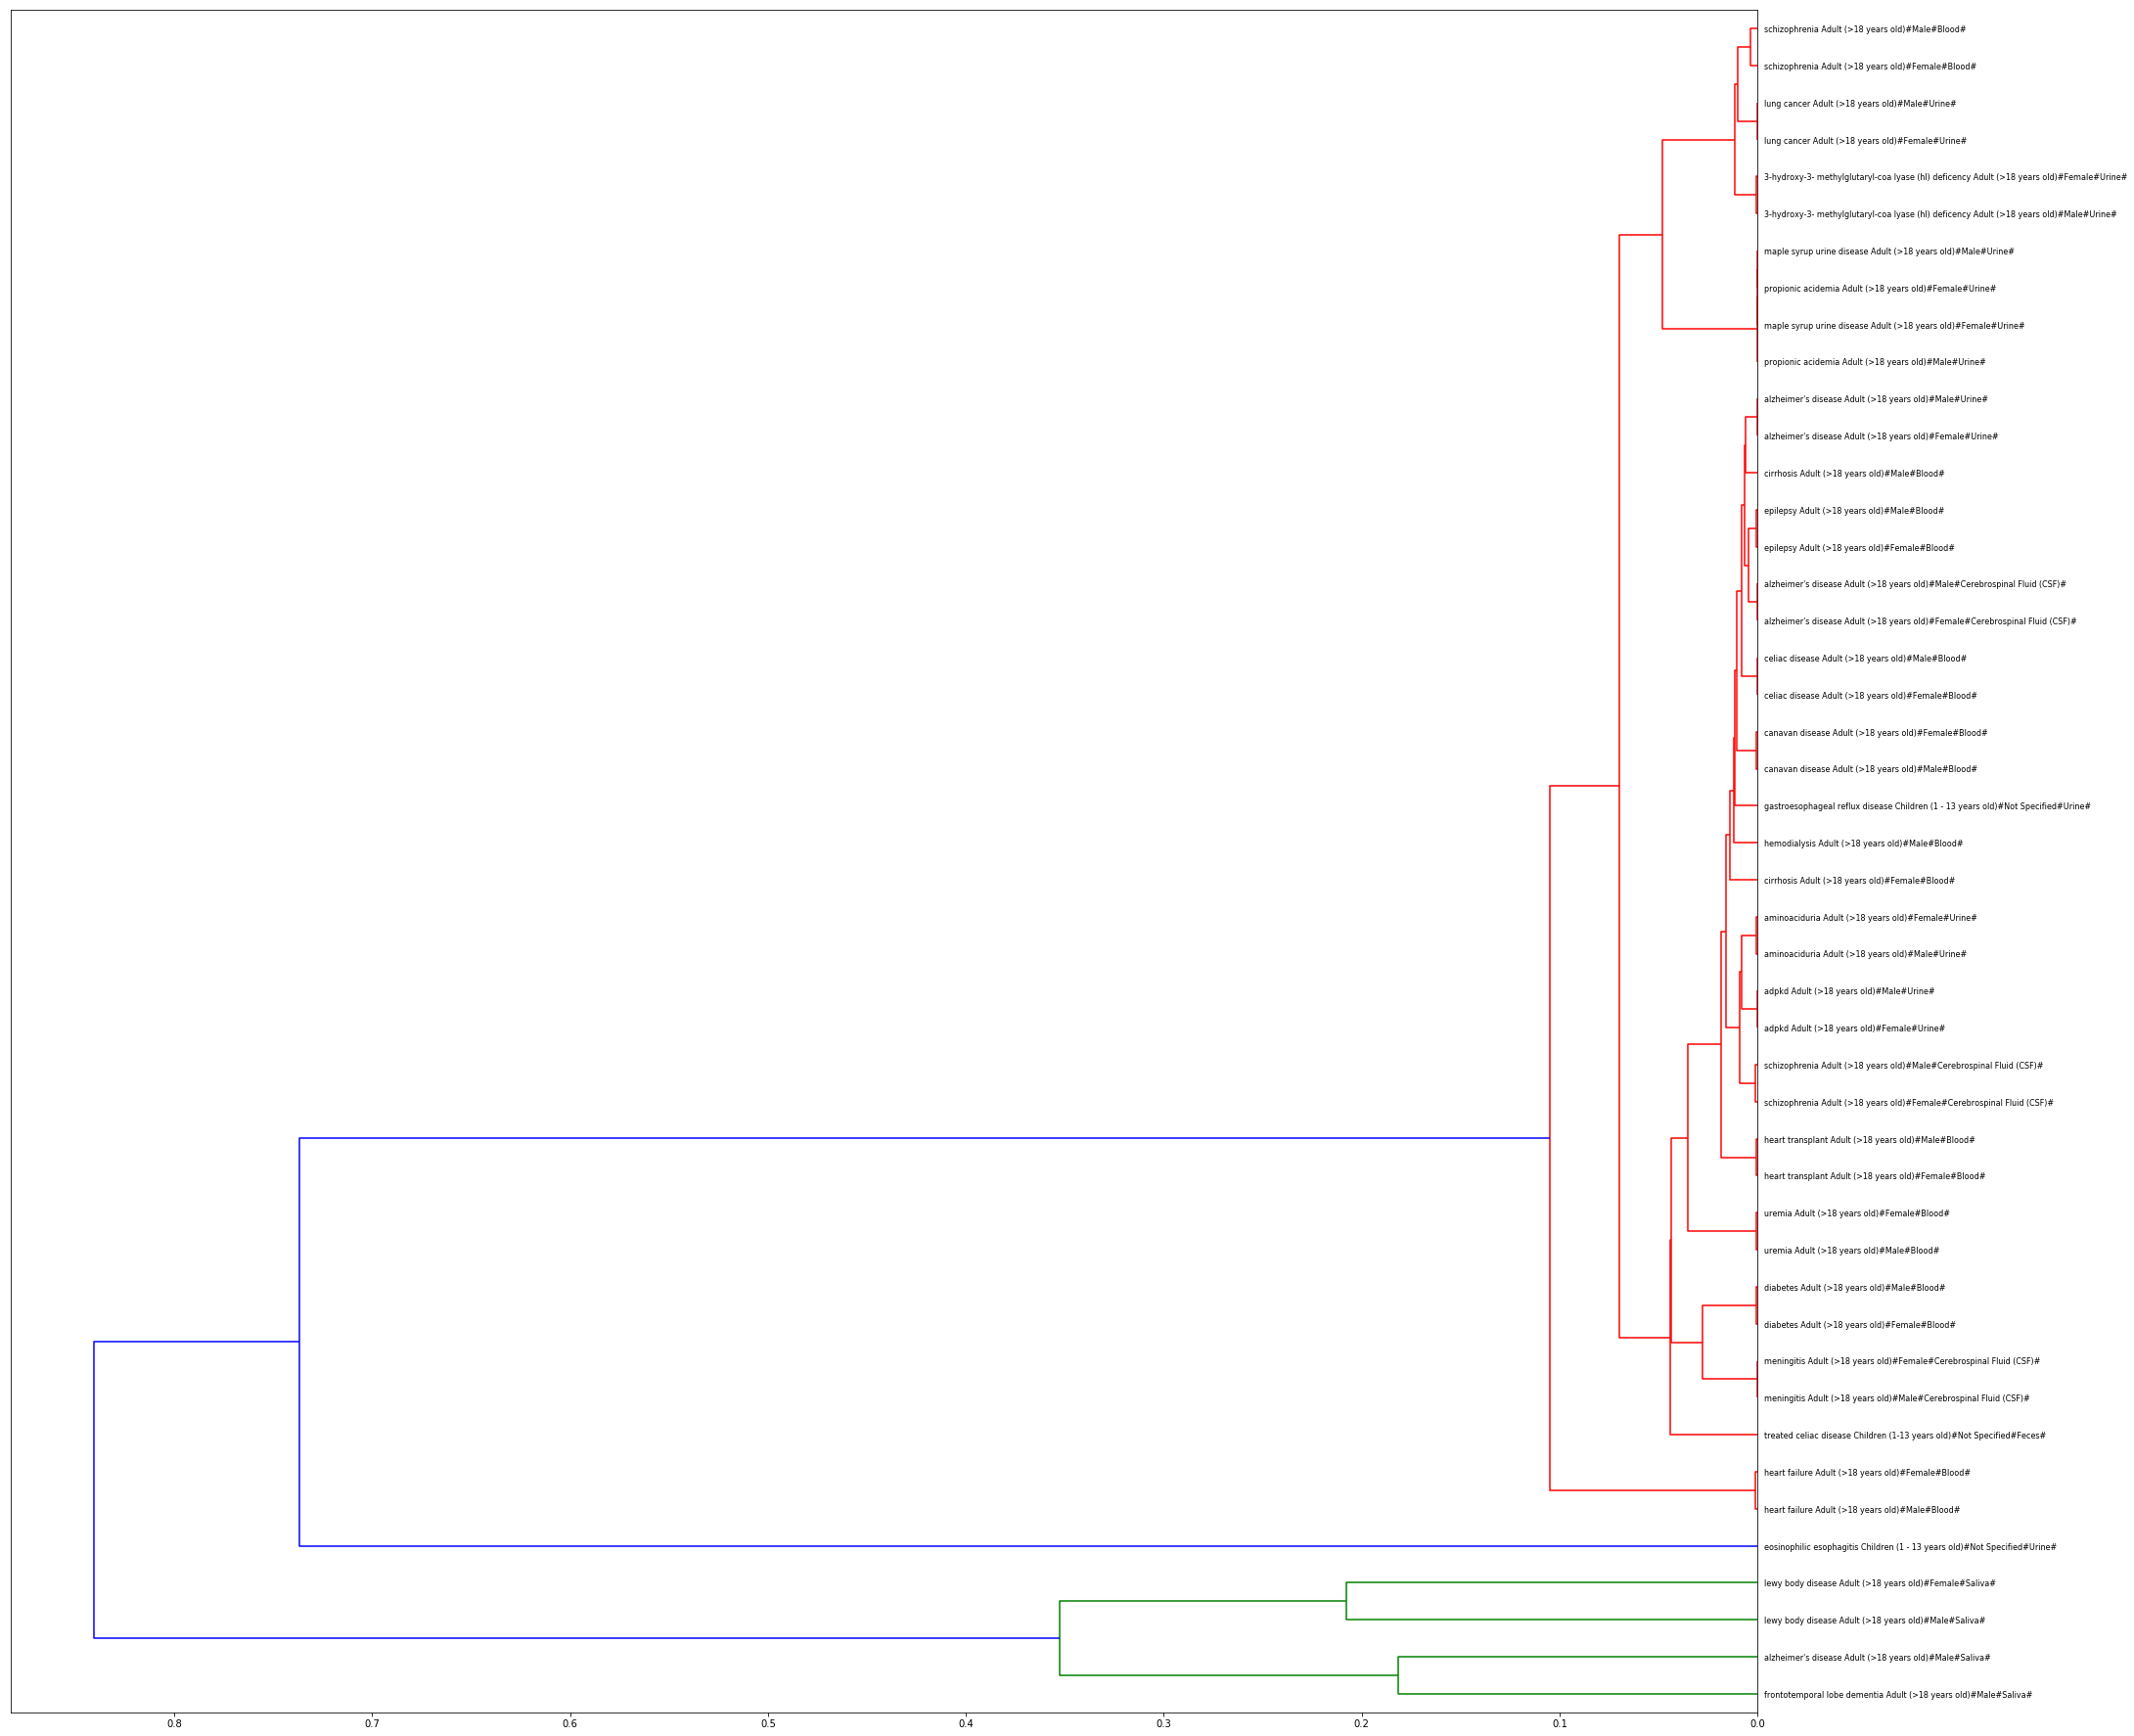

In [13]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform, pdist
import matplotlib.pyplot as plt

%matplotlib inline

plt.rcParams["figure.figsize"] = (32,32)

linkage_matrix = linkage(pdist(df.T, 'cosine'))
dendrogram(linkage_matrix, labels=y_results, orientation='left')


plt.show()

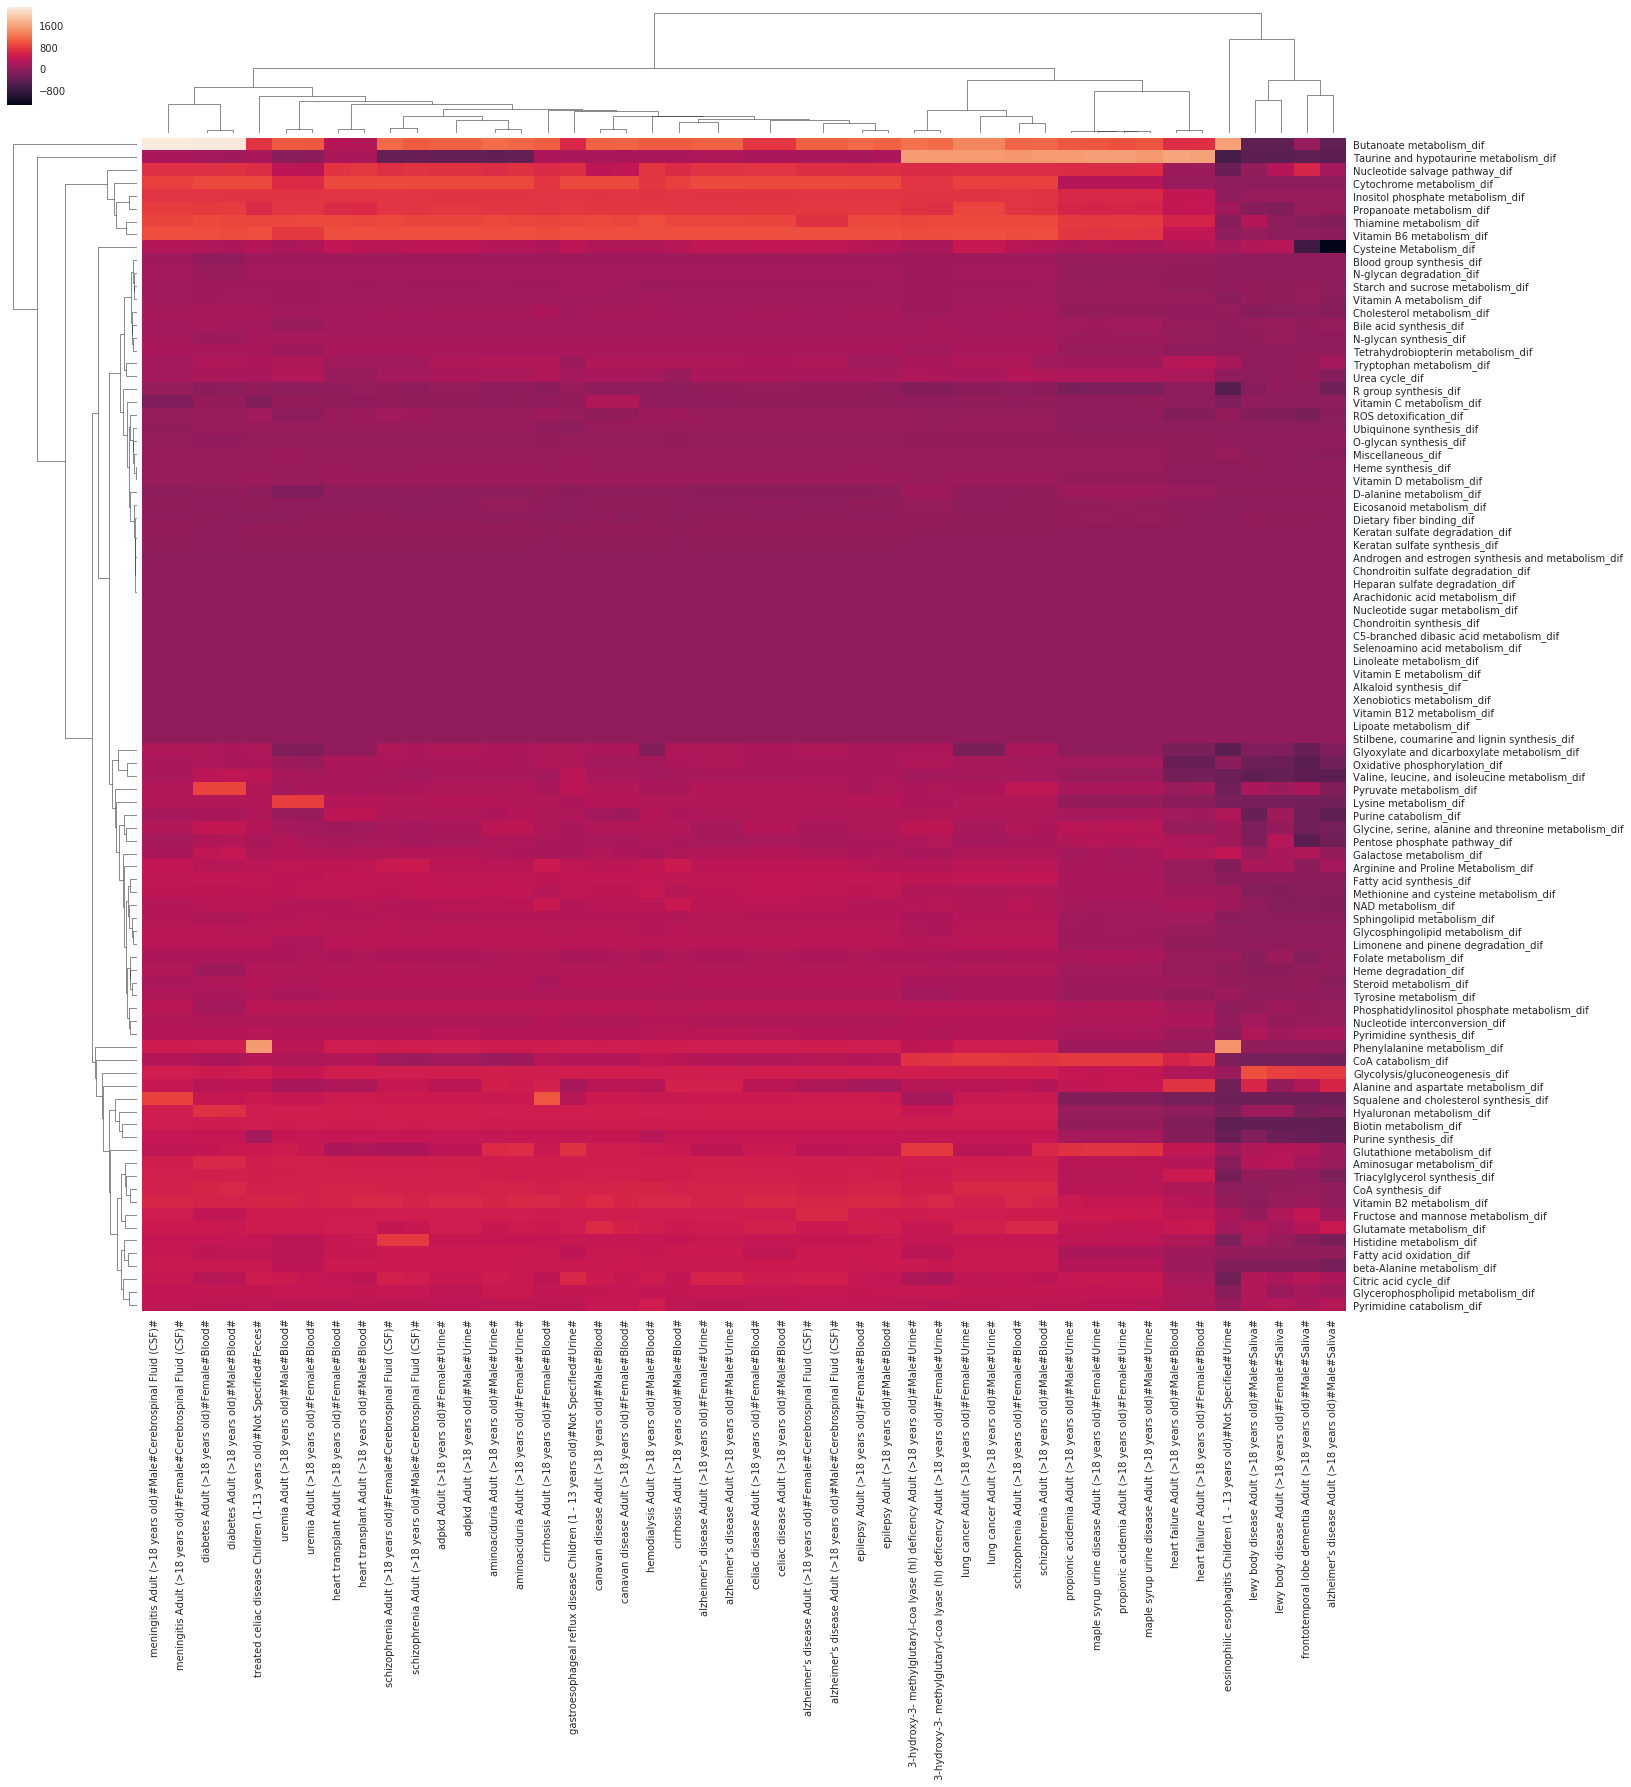

In [14]:
%matplotlib inline

import seaborn as sns
from scipy.cluster.hierarchy import linkage

sns.set(color_codes=True)

sns.clustermap(df, figsize=(24, 24))

/opt/conda/lib/python3.5/site-packages/seaborn/matrix.py:603: ClusterWarning:

scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix



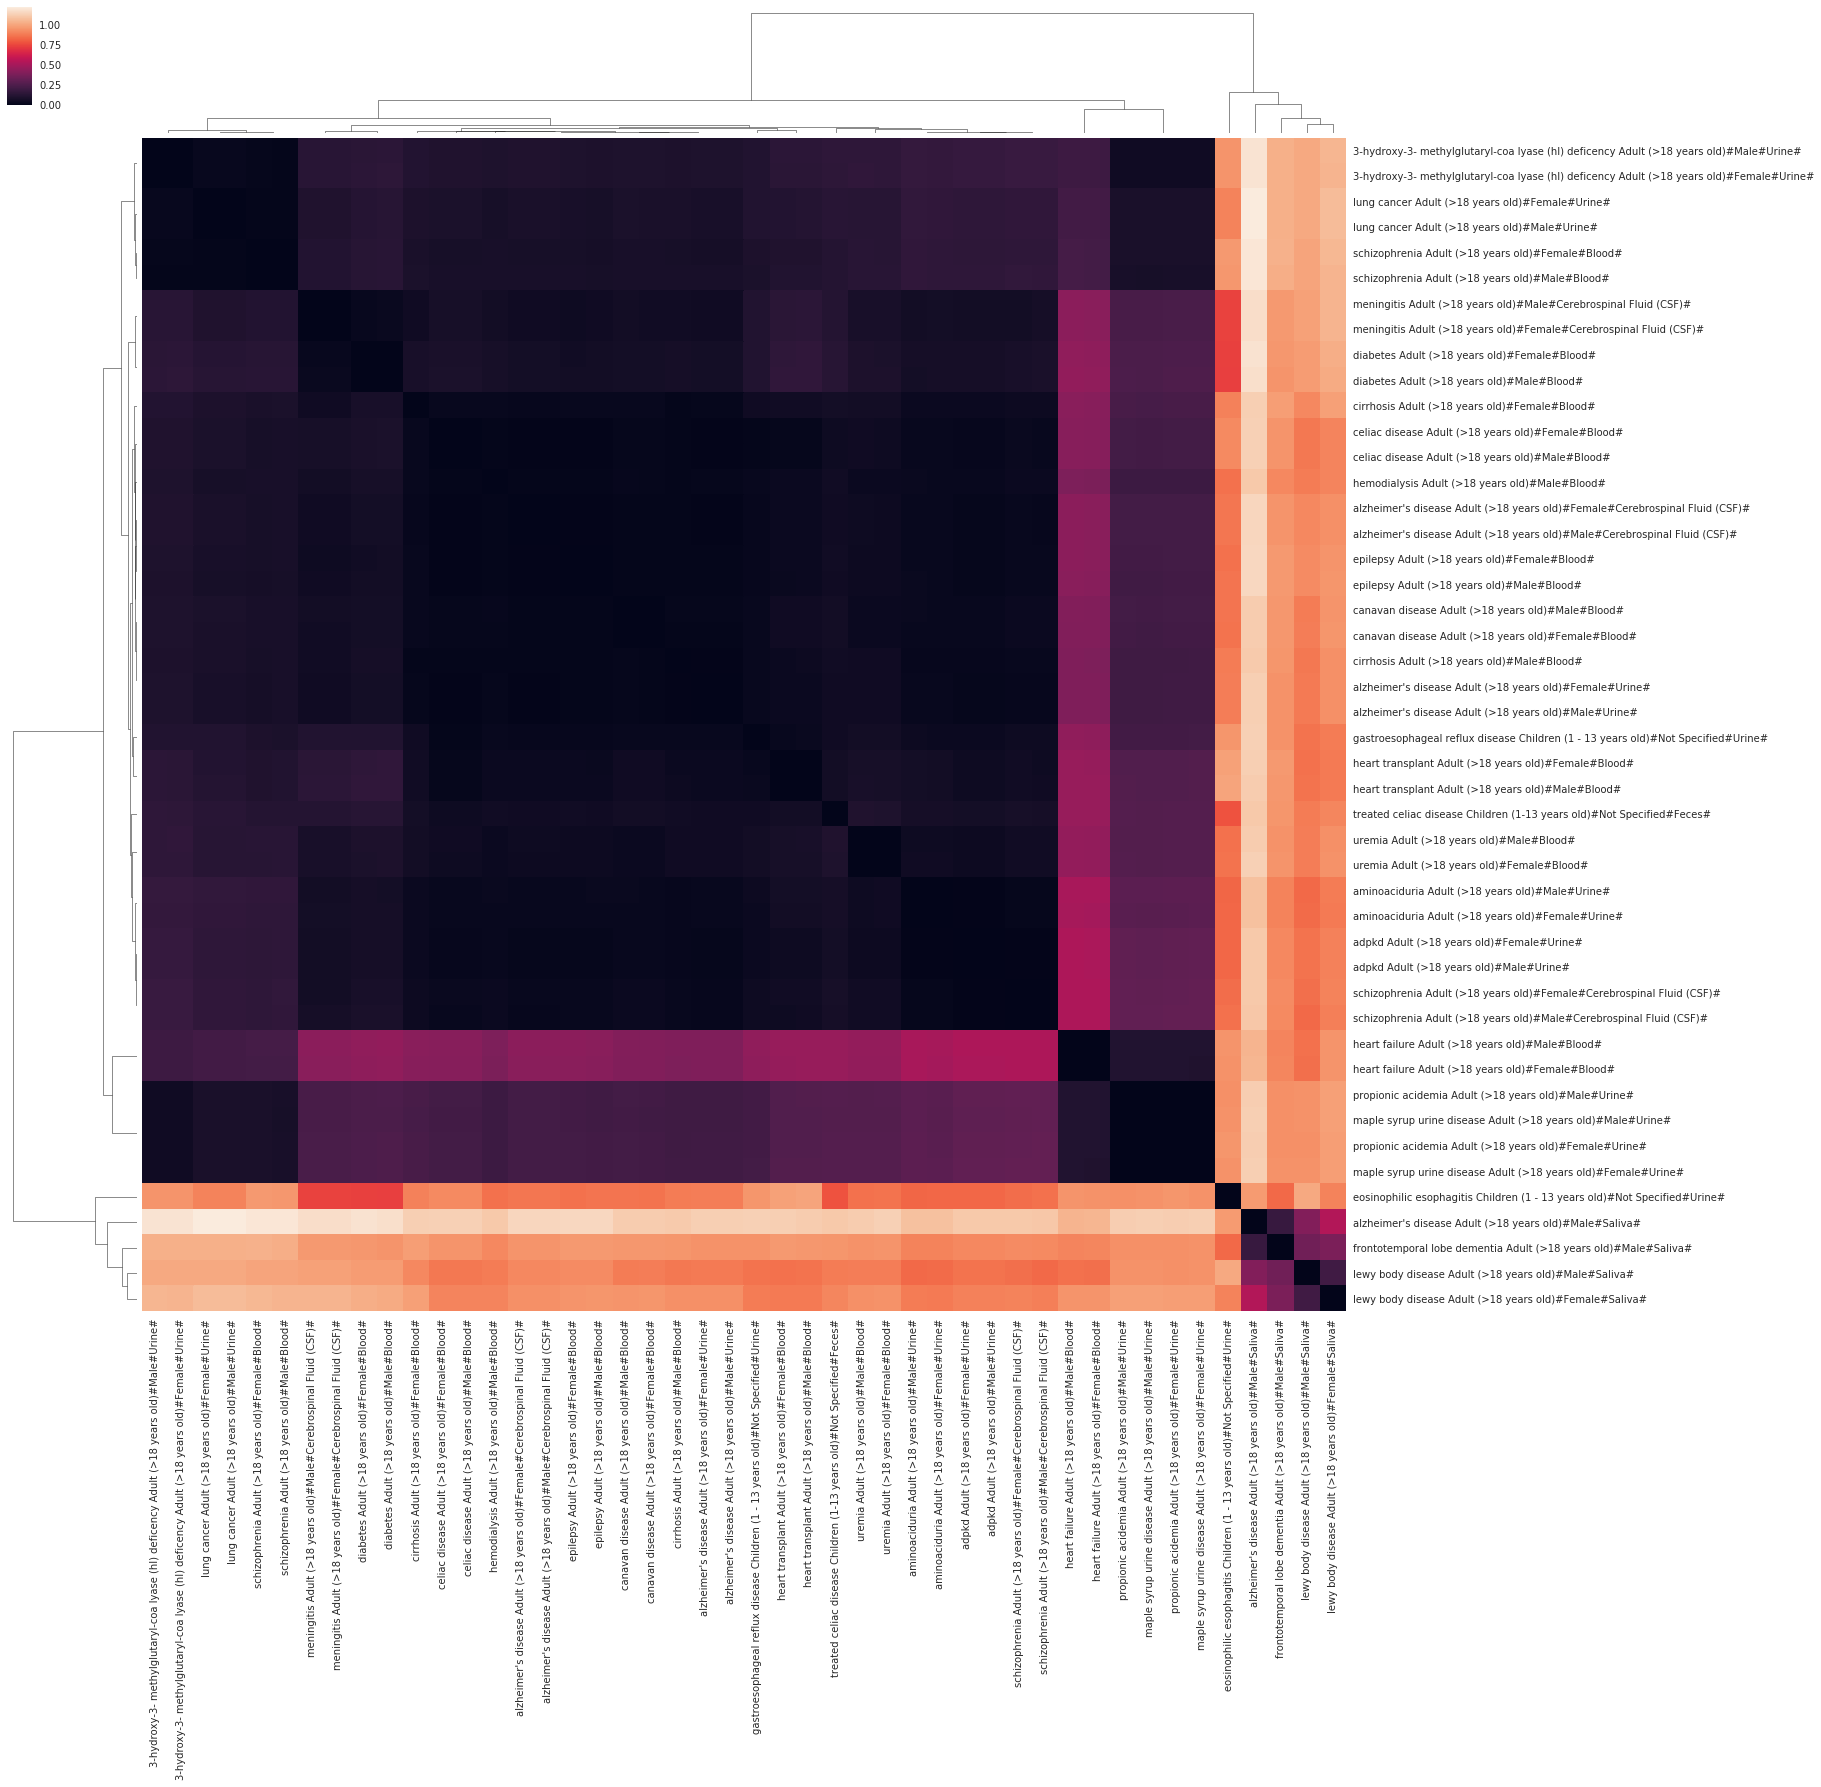

In [15]:
sns.clustermap(df_squareform, figsize=(24, 24))

In [16]:
from sklearn.decomposition import PCA
from sklearn.feature_extraction import DictVectorizer

pca = PCA(n_components=2)
vect = DictVectorizer(sparse=False)
X_pca = pca.fit_transform(vect.fit_transform(X_results))

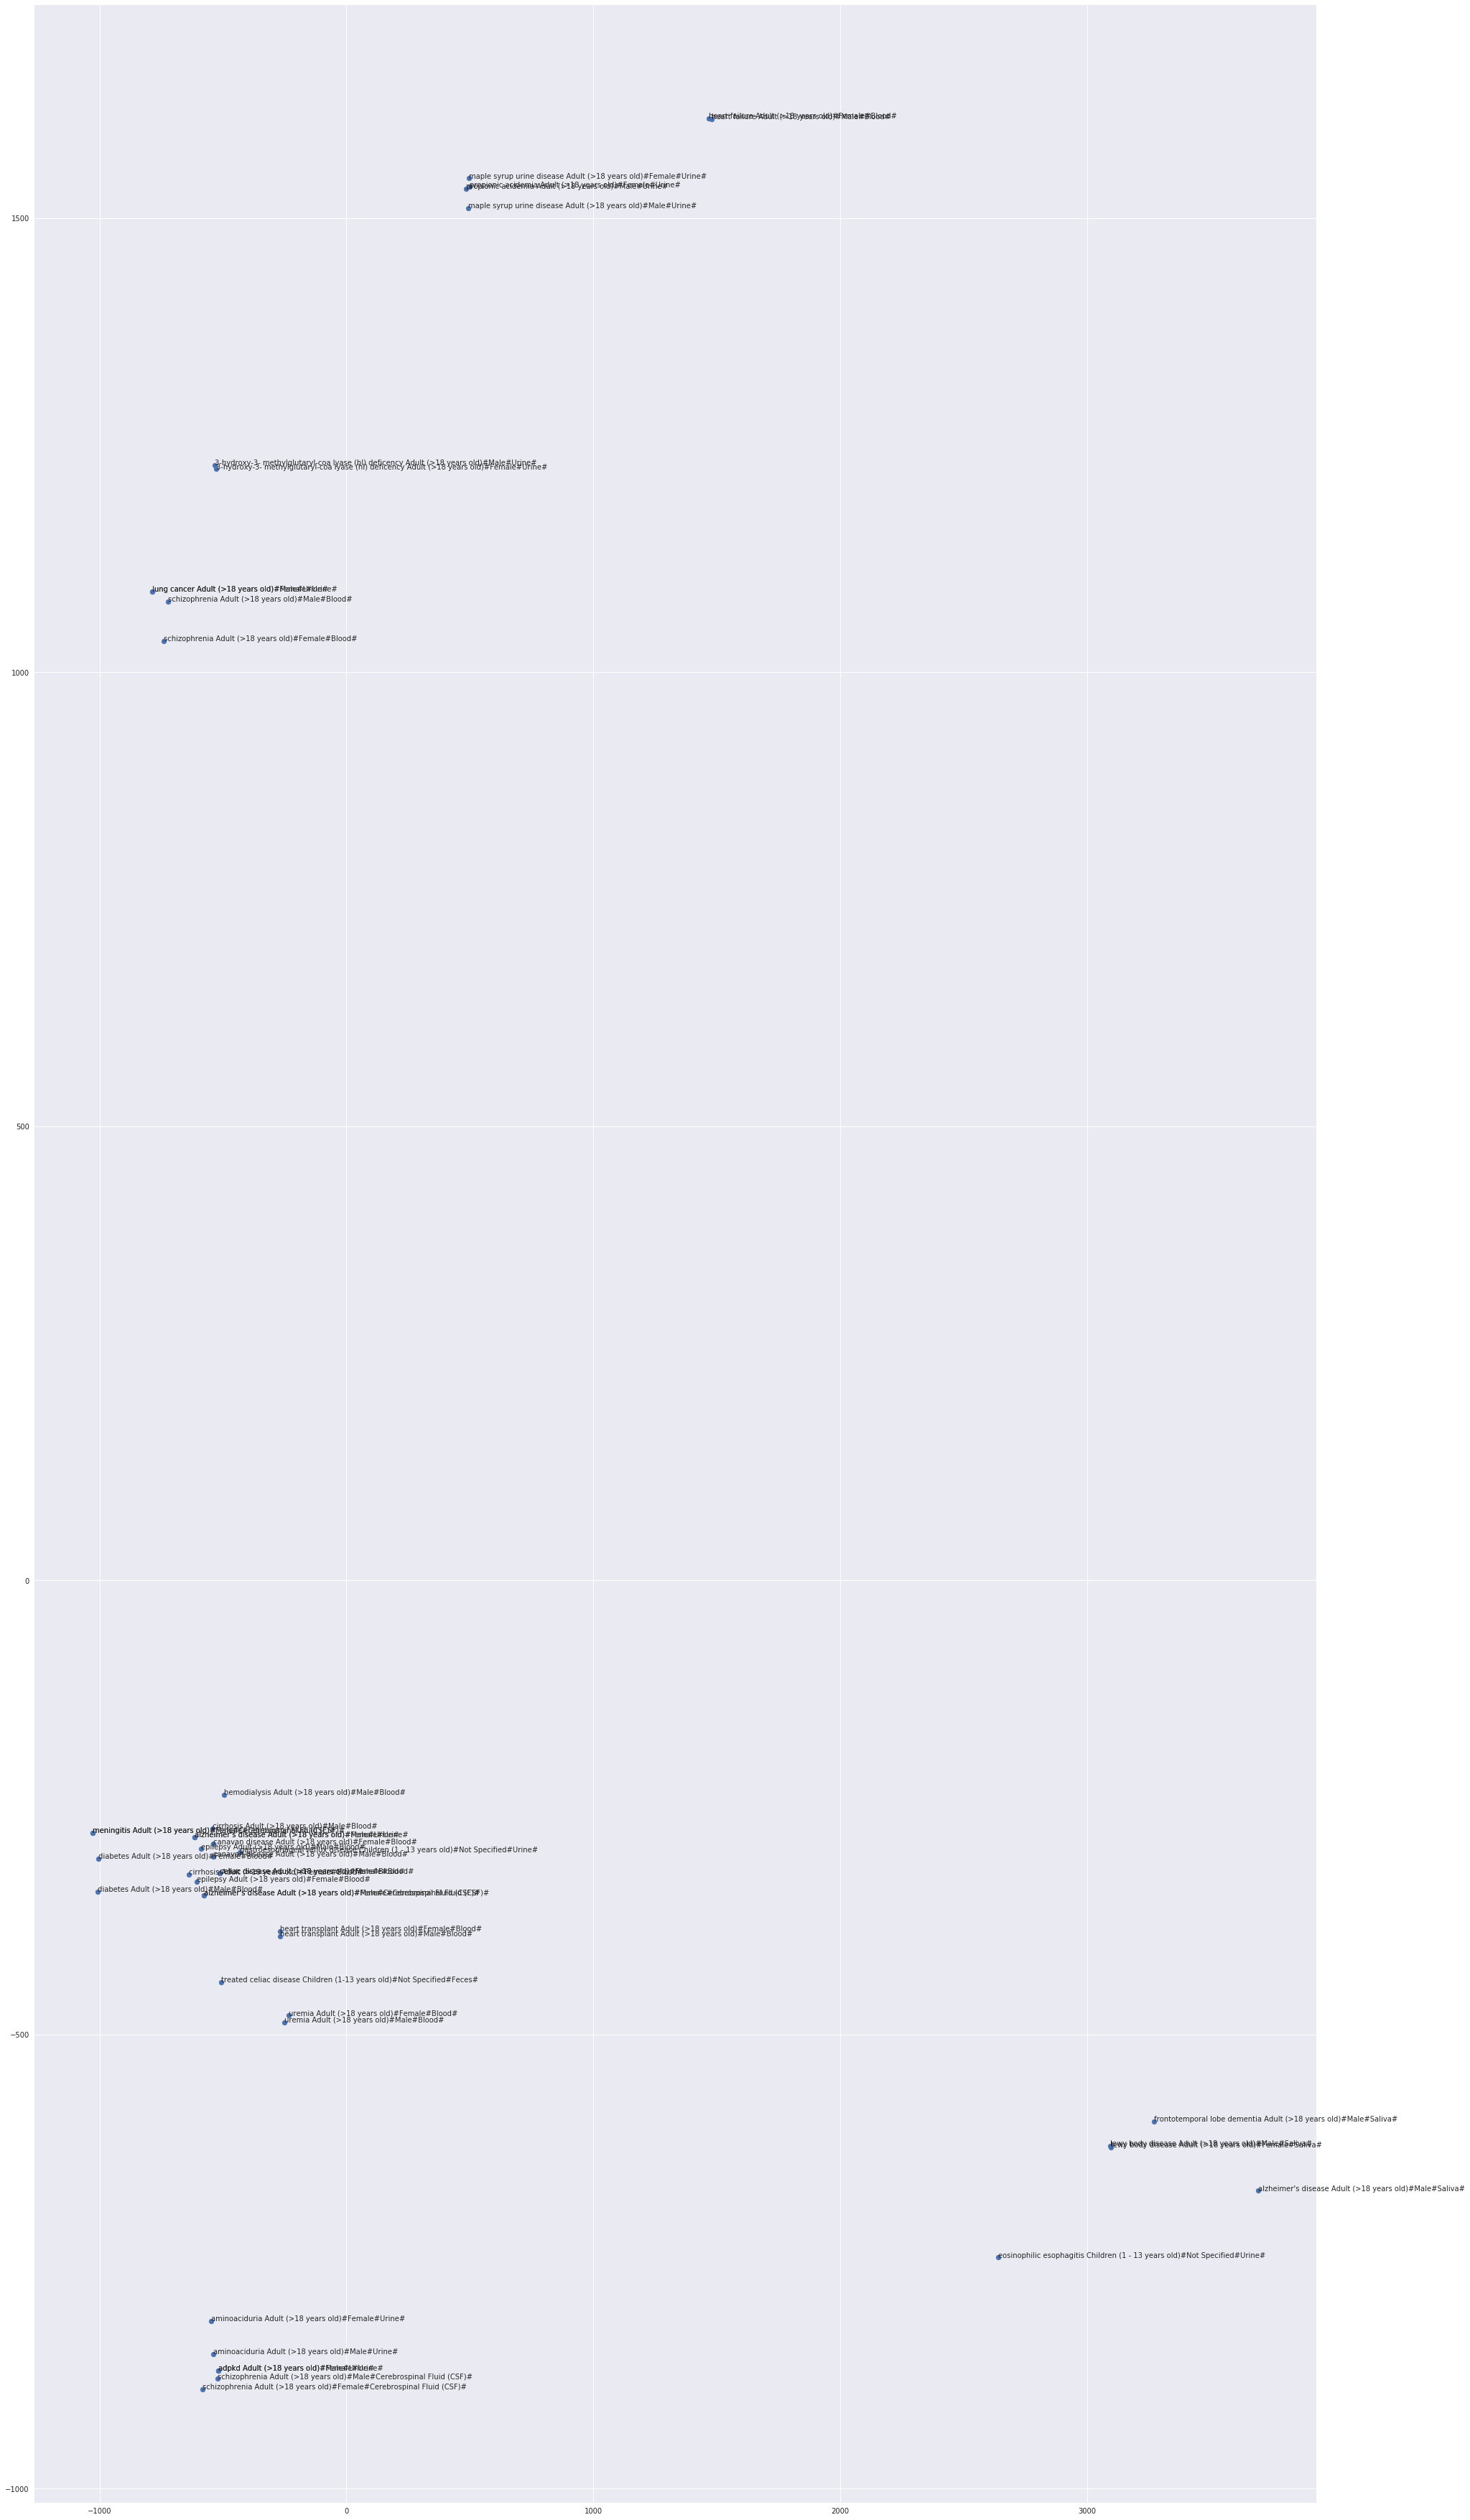

In [17]:
%matplotlib inline

pc1, pc2 = zip(*X_pca)

fig, ax = plt.subplots(figsize=(32, 64))
ax.scatter(pc1, pc2)

for i, txt in enumerate(y_results):
    ax.annotate(txt, (pc1[i], pc2[i]))

plt.show()

In [18]:
df_row.filter(like="Saliva").dropna(how="all")

,frontotemporal lobe dementia Adult (>18 years old)#Male#Saliva#,lewy body disease Adult (>18 years old)#Male#Saliva#,alzheimer's disease Adult (>18 years old)#Male#Saliva#,lewy body disease Adult (>18 years old)#Female#Saliva#
3pg_c,NaN,NaN,NaN,0.325
4abut_e,NaN,NaN,NaN,3.439
HC00342_m,11.616,14.814,15.279,6.493
ade_e,-0.368,-2.216,-0.155,-2.108
adn_l,1.000,0.250,0.667,-0.020
ala_L_c,0.357,0.257,0.500,0.358
amp_e,2.382,2.745,0.264,11.835
arg_L_c,2.202,1.419,1.641,-1.504
asn_L_l,-1.237,0.392,-0.292,0.716
asp_L_m,NaN,NaN,NaN,-0.035


In [19]:
X_clustring, y_clustring = zip(*filter(lambda x: 'Saliva' not in x[1] ,zip(X_results, y_results)))

In [20]:
len(X_clustring)

42

In [21]:
len(y_clustring)

42

In [22]:
y_labels = list(map(lambda x: x.split('(')[0].strip().title(), y_clustring))

In [23]:
n_clusters = len(set(y_labels))

In [24]:
n_clusters

21

In [25]:
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering(n_clusters=n_clusters, affinity="correlation", linkage="complete")

y_predicted = clustering.fit_predict(vect.fit_transform(X_clustring), y_labels)

In [26]:
metrics.adjusted_rand_score(y_labels, y_predicted)

0.64315162620247368

In [27]:
metrics.adjusted_mutual_info_score(y_labels, y_predicted)

0.76103735648296889

In [28]:
metrics.homogeneity_score(y_labels, y_predicted)

0.94040865189285106

In [29]:
metrics.completeness_score(y_labels, y_predicted)

0.94435864679295856

In [30]:
metrics.v_measure_score(y_labels, y_predicted)

0.94237951024846023